---
---



---
---




# **Ejemplo práctico Árbol de Decisión**



---
---





---
---

# 1. Importar librerias



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydotplus
import graphviz 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn import tree


%matplotlib notebook


ModuleNotFoundError: No module named 'numpy'

# 2. Cargar dataset



https://www.kaggle.com/uciml/glass


In [ ]:
df = pd.read_csv('glass.csv', sep=',')


# 3. Visualizar dataframe

In [ ]:
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 4. Preprocesamiento

In [ ]:
df.columns


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
df.isna().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df['Type'].nunique()


6

In [ ]:
x = df.iloc[:, :9].values
y = df.iloc[:,9].values


In [ ]:
x = StandardScaler().fit_transform(x)
x


array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# 5. Dividir dataset entre training y testing set
### Se selecciona aleatoriamente el 70% training y 30% testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


# 6. Modelo Árbol de decisión

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


# 7. Predicción


In [ ]:
y_pred = clf.predict(X_test)


# 8. Cálculo accuracy 

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')


Accuracy:  63.07692307692307 %


# 9. Visualización árbol 

In [ ]:
fn = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
cn = ['buildingwindowsfloatprocessed','buildingwindowsnonfloatprocessed',
      'vehiclewindowsfloatprocessed','containers','tableware','headlamps']
cn


['buildingwindowsfloatprocessed',
 'buildingwindowsnonfloatprocessed',
 'vehiclewindowsfloatprocessed',
 'containers',
 'tableware',
 'headlamps']

<IPython.core.display.Javascript object>


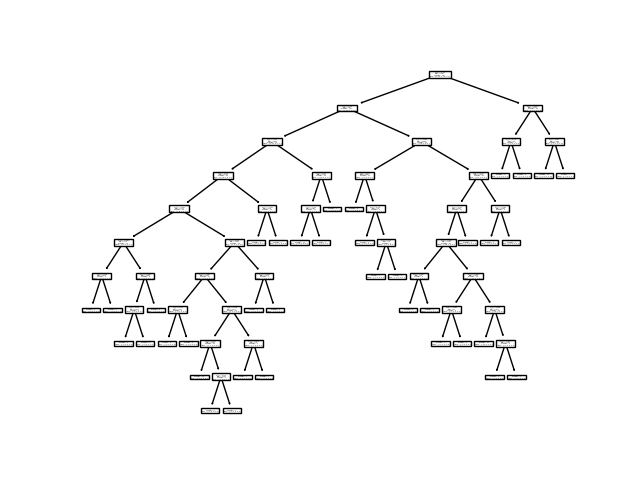

[Text(359.71857923497265, 352.79999999999995, 'X[7] <= 0.423\ngini = 0.736\nsamples = 149\nvalue = [44, 56, 9, 10, 6, 24]'),
 Text(266.8032786885246, 319.2, 'X[3] <= -0.08\ngini = 0.67\nsamples = 124\nvalue = [43, 55, 9, 9, 6, 2]'),
 Text(192.0983606557377, 285.59999999999997, 'X[6] <= 1.073\ngini = 0.597\nsamples = 75\nvalue = [40, 25, 6, 1, 2, 1]'),
 Text(142.9726775956284, 252.0, 'X[2] <= 0.793\ngini = 0.531\nsamples = 63\nvalue = [40, 15, 6, 0, 1, 1]'),
 Text(98.92896174863388, 218.39999999999998, 'X[0] <= -0.467\ngini = 0.476\nsamples = 53\nvalue = [37, 8, 6, 0, 1, 1]'),
 Text(43.36612021857923, 184.8, 'X[0] <= -0.782\ngini = 0.75\nsamples = 12\nvalue = [3, 3, 4, 0, 1, 1]'),
 Text(21.683060109289617, 151.2, 'X[4] <= 2.192\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 0, 0, 1, 0]'),
 Text(10.841530054644808, 117.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]'),
 Text(32.52459016393443, 117.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 T

In [ ]:
tree.plot_tree(clf) 


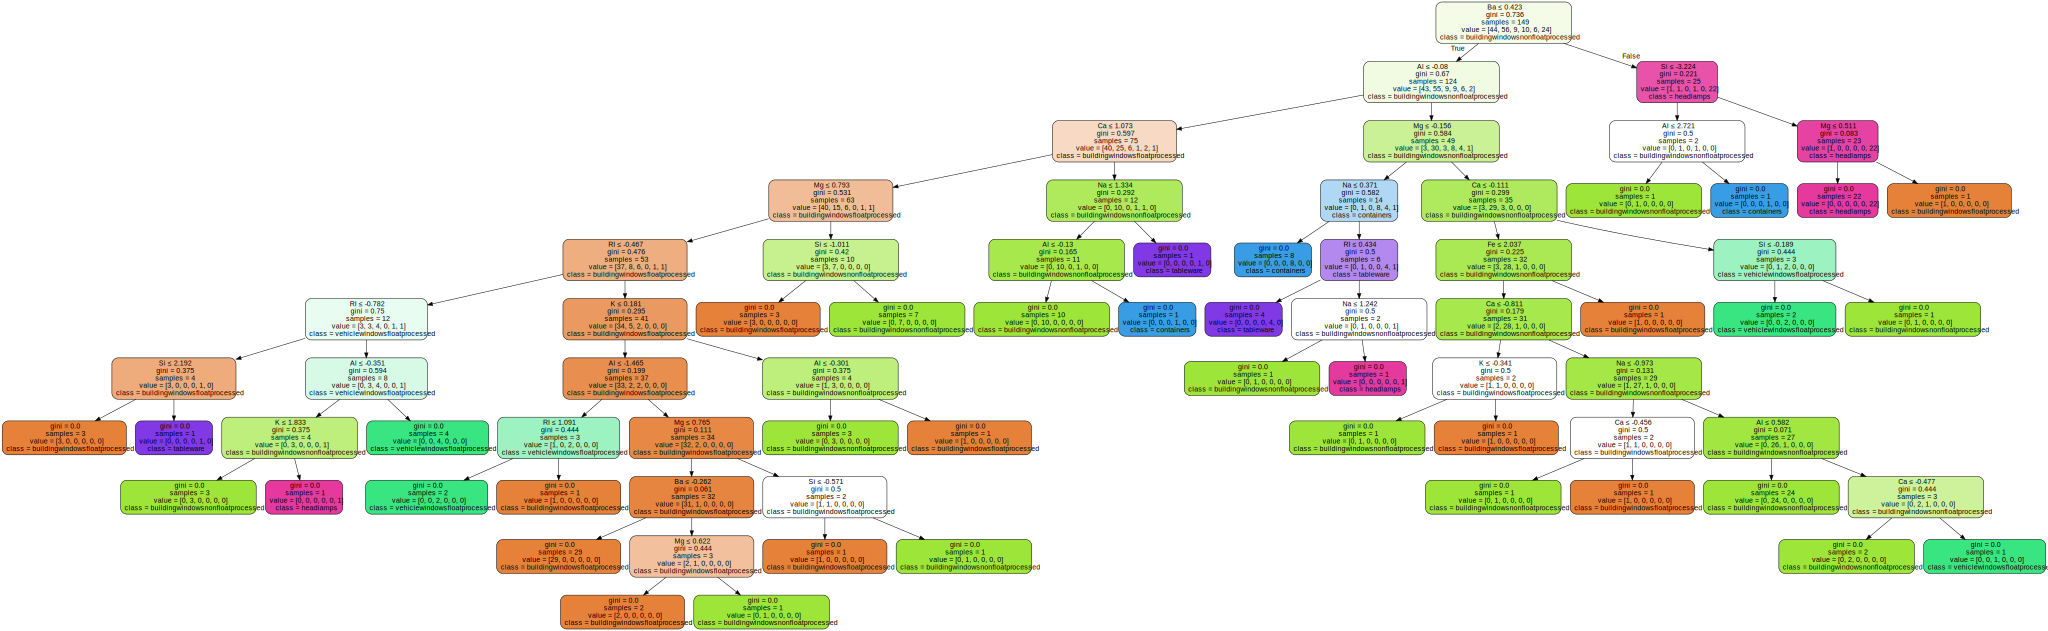

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,
                                filled=True, rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph  


### **sklearn.tree.DecisionTreeClassifier**
#### (*, 
#### criterion='gini', 
#### splitter='best', 
#### max_depth=None, 
#### min_samples_split=2, 
#### min_samples_leaf=1, 
#### min_weight_fraction_leaf=0.0, 
#### max_features=None, 
#### random_state=None, 
#### max_leaf_nodes=None, 
#### min_impurity_decrease=0.0, 
#### min_impurity_split=None, 
#### class_weight=None, 
#### presort='deprecated', 
#### ccp_alpha=0.0)
